For detailed information about the dataset and its respective preparation and/or Principal Component Analysis please look at 'Titanic(age_by_mean)_PCA_LogisticRegression'.
In this file I will skip each step explained in that file and will talk about only the things not covered in it.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
df = pd.read_csv('Data/titanic_train.csv')

In [2]:
df = df.drop(['Name','Ticket','Cabin'], axis=1)

In [3]:
df.loc[:,"Age"].median()


28.0

In [4]:
df["Age"].fillna(28, inplace = True)

In [5]:
df.dropna(inplace=True)

In [6]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [7]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [8]:
X=df.drop('Survived',axis=1)
X_renamed = X.rename(columns={'SibSp': 'Num Siblings/Spoused','Parch':'Num Parents/Children'})
y=df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_renamed, y, test_size=0.3,random_state=2)

I will import the random forest regressor library and try to find out which hyperparameters suit our dataset best.

In [9]:
from sklearn import ensemble

variance_score = []
for i in range(5,200,5):
    RFR = ensemble.RandomForestRegressor ( n_estimators=i, random_state=2 )
    RFR.fit(X_train, y_train)
    prediction_RFR = RFR.predict(X_test)
    variance_score.append(r2_score(y_test, prediction_RFR))

variance_score

[0.3141224984839296,
 0.33824802910855056,
 0.33520760056599963,
 0.3397862340812614,
 0.36054714372346874,
 0.3699116636345259,
 0.3729014244873208,
 0.37471967859308675,
 0.3780014823798935,
 0.3853591995148574,
 0.3864843706929819,
 0.3903446027895694,
 0.3920301132836469,
 0.39031238474771357,
 0.39309736001617135,
 0.3972336359157066,
 0.39885235258445406,
 0.3983269770680322,
 0.3985217129831058,
 0.40074610673135236,
 0.4051642595182403,
 0.40643486911677007,
 0.40722590881109144,
 0.40670377248837675,
 0.40538112310491214,
 0.4056722812104163,
 0.40519631551233193,
 0.40497324599943063,
 0.4024621905395769,
 0.40273389933292914,
 0.4012055059383891,
 0.4027773721763189,
 0.4041081212923101,
 0.4044583547541657,
 0.4052212423113576,
 0.4045787458167689,
 0.404870382519277,
 0.4033922094982437,
 0.40375706991147586]

In [10]:
print('The maximum variance score is:',max(variance_score),'.')
index = variance_score.index(max(variance_score))
estimators = index*5
print('The number of estimators to be used is: ',estimators,'.')

The maximum variance score is: 0.40722590881109144 .
The number of estimators to be used is:  110 .


In [15]:
RFR = ensemble.RandomForestRegressor ( n_estimators=estimators, random_state=2 )
RFR.fit(X_train, y_train)
prediction_RFR = RFR.predict(X_test)


print('Variance score: %.4f' % r2_score(y_test, prediction_RFR))


Variance score: 0.4064


Since this is a regression the values are non binary so I will transform those into binary values so I can visualize the confusion matrix.

In [12]:
for i in range(0,len(prediction_RFR)):
    if prediction_RFR[i]==0:
        prediction_RFR[i]= prediction_RFR[i]
    elif prediction_RFR[i] == 1:
       prediction_RFR[i]= prediction_RFR[i]
    elif prediction_RFR[i]> 0.5:
        prediction_RFR[i]=1
    else:
        prediction_RFR[i]=0
         
prediction_RFR

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       170
           1       0.78      0.68      0.73        97

    accuracy                           0.81       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267



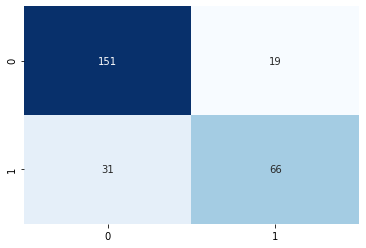

In [13]:
cfm = confusion_matrix(y_test,prediction_RFR)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')
print(classification_report(y_test, prediction_RFR))

In [14]:
Score = round(RFR.score(X_train, y_train) * 100, 2)
Score

91.8